In [1]:
import numpy as np
import pandas as pd

import straticor as scr

import matplotlib.pyplot as plt

plt.style.use("https://raw.githubusercontent.com/srnarvaez/my-mpl-themes/main/basic.mplstyle")

%matplotlib widget

In [2]:
la_amarilla_1 = scr.load_column("../data/afloramiento/quebrada_la_amarilla_1/lam1.xlsx")
la_amarilla_1

,bottom,environment,color,label,center
0,200.014899,7.0,#474440,Unknown,100.009134
1,199.982255,4.0,#ffb400,Fluvial,199.998577
2,199.949611,4.0,#ffb400,Fluvial,199.965933
3,199.916967,3.0,#5e569b,Deltaic,199.933289
4,199.884322,3.0,#5e569b,Deltaic,199.900644
...,...,...,...,...,...
6123,0.133946,4.0,#ffb400,Fluvial,0.150268
6124,0.101302,4.0,#ffb400,Fluvial,0.117624
6125,0.068657,4.0,#ffb400,Fluvial,0.084979
6126,0.036013,4.0,#ffb400,Fluvial,0.052335


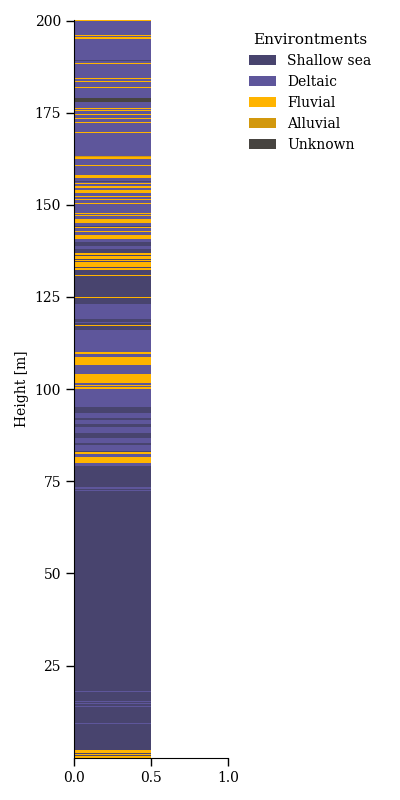

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(4, 8))

scr.plot_column(la_amarilla_1, ax=ax, width=0.5, lw=0.0)

ax.set(ylabel="Height [m]", xlim=(0, 1), ylim=(la_amarilla_1["bottom"].min(), la_amarilla_1["bottom"].max()))

plt.show()

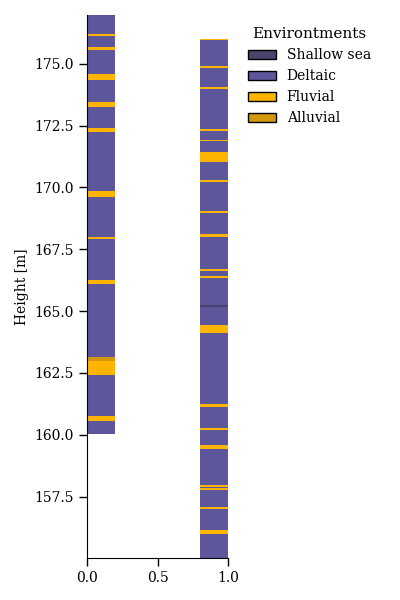

In [4]:
col_1 = la_amarilla_1.query("bottom >= 160 & bottom <= 177").copy()
col_2 = la_amarilla_1.query("bottom >= 179 & bottom <= 200").copy()

col_2["bottom"] = col_2["bottom"] - 24

fig, ax = plt.subplots(1, 1, figsize=(4, 6))

scr.plot_column(col_1, ax=ax, x_pos=0.0, lw=0.0, legend=False)
scr.plot_column(col_2, ax=ax, x_pos=0.8, lw=0.0, legend=False)

scr.add_legend(pd.concat([col_1, col_2]), ax=ax, loc="upper left", bbox_to_anchor=(1.05, 1.0))

ax.set(ylabel="Height [m]", xlim=(0, 1), ylim=(col_2["bottom"].min(), col_1["bottom"].max()))

plt.show()

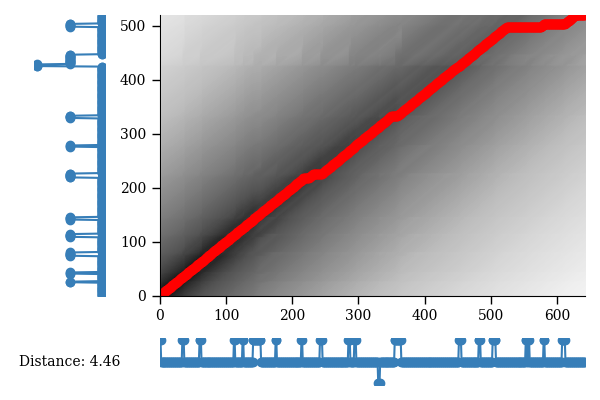

In [5]:
distance, cost_matrix = scr.dtw_log(col_1, col_2, alpha=0.05, cost_func="chrono", penalty=0.1)
col_3, best_path = scr.warp_log(col_1, col_2, cost_matrix)

scr.plot_warpingpaths(col_1, col_2, cost_matrix, best_path, distance)
plt.show()

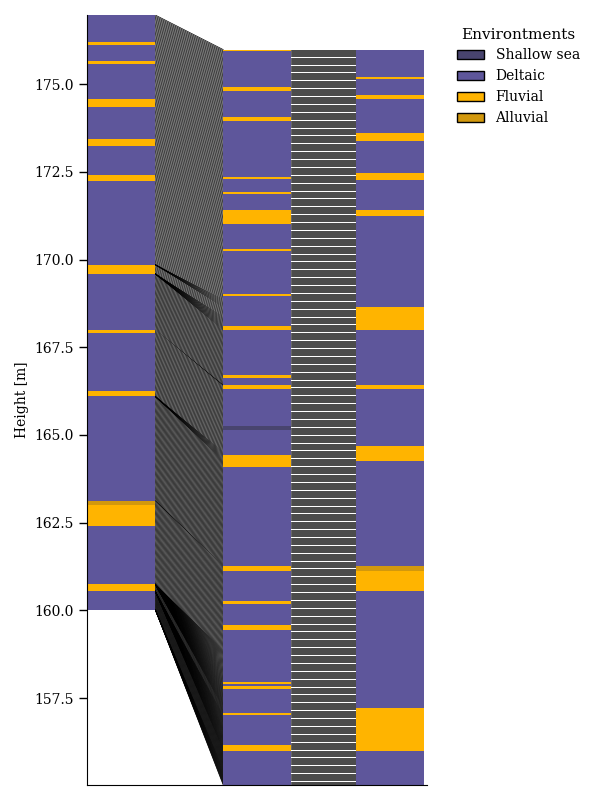

In [6]:
fig, ax = plt.subplots(1, figsize=(6, 8))

scr.plot_column(column=col_1, ax=ax, x_pos=0.0, width=0.2, lw=0.0, legend=False)
scr.plot_column(column=col_2, ax=ax, x_pos=0.4, width=0.2, lw=0.0, legend=False)
scr.plot_column(column=col_3, ax=ax, x_pos=0.79, width=0.2, lw=0.0, legend=False)

for idx, idy in best_path:
    plt.plot([0.2, 0.4], [col_1["bottom"].iloc[idx], col_2["bottom"].iloc[idy]], "-k", lw=0.5, zorder=-1)

for b in col_2["bottom"]:
    plt.plot([0.6, 0.8], [b, b], "-k", lw=0.5, zorder=-1)

ax.set(xticks=[], xlim=(0, 1), ylabel="Height [m]", ylim=(col_2["bottom"].min(), col_1["bottom"].max()))

scr.add_legend(pd.concat([col_1, col_2]), ax=ax, loc="upper left", bbox_to_anchor=(1.05, 1.0))

fig.savefig("../images/test_la_amarilla_1_subset_correlation.png", dpi=300, bbox_inches="tight")

plt.show()